### Importing Dependencies

In [1]:
# Importing dependecies:
import re
import sys
import string
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes()

# Configuring Notebook environment:
# Set custom preferences for displaying and visualizing data
# sns.set_style('white')
pd.set_option('max_colwidth', 120)
pd.set_option('max_columns', 200)
pd.set_option('precision', 2)
plt.rcParams["figure.figsize"] = (10, 7.5)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

%matplotlib inline

In [2]:
df = pd.read_csv('data/strings/df_clean.csv', index_col=0)
df.head()

,title,ingredients,instructions,ingredients_vector,instructions_vector
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,celery finely chopped green pepper finely chopped finely sliced green onions chopped parsley crabmeat cups coarsely ...,toss ingredients lightly spoon buttered baking dish top additional crushed cracker crumbs brush melted butter bake p...,"['celery', 'finely', 'chopped', 'green', 'pepper', 'finely', 'chopped', 'finely', 'sliced', 'green', 'onions', 'chop...","['toss', 'ingredients', 'lightly', 'spoon', 'buttered', 'baking', 'dish', 'top', 'additional', 'crushed', 'cracker',..."
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,skirt steak cut inch dicekosher salt fresh cracked black pepper slices thickcut applewood smoked bacon inch diced cu...,watch make recipe sprinkle steak salt pepper set aside dutch oven preferably enameled cast iron mediumhigh heat rend...,"['skirt', 'steak', 'cut', 'inch', 'dicekosher', 'salt', 'fresh', 'cracked', 'black', 'pepper', 'slices', 'thickcut',...","['watch', 'make', 'recipe', 'sprinkle', 'steak', 'salt', 'pepper', 'set', 'aside', 'dutch', 'oven', 'preferably', 'e..."
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,cups dried black beans picked rinsed cups water plus cloves garlic tablespoons vegetable oil green bell pepper finel...,saucepan let beans soak enough cold water cover hour drain return beans pan cups water garlic bring water boil lower...,"['cups', 'dried', 'black', 'beans', 'picked', 'rinsed', 'cups', 'water', 'plus', 'cloves', 'garlic', 'tablespoons', ...","['saucepan', 'let', 'beans', 'soak', 'enough', 'cold', 'water', 'cover', 'hour', 'drain', 'return', 'beans', 'pan', ..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,ground chuckone tomato sauce saltfreshly ground black pepper ounces egg noodles sour cream cups curd cottage cheesep...,watch make recipe preheat oven degrees f brown ground chuck skillet drain fat add tomato sauce salt plenty freshly g...,"['ground', 'chuckone', 'tomato', 'sauce', 'saltfreshly', 'ground', 'black', 'pepper', 'ounces', 'egg', 'noodles', 's...","['watch', 'make', 'recipe', 'preheat', 'oven', 'degrees', 'f', 'brown', 'ground', 'chuck', 'skillet', 'drain', 'fat'..."
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,rice brown mediumgrain cookedcup quinoacup sweet red peppers raw white tuna canned water drained solids tbs seaweed ...,special equipment sushi mat cook brown rice quinoa cups water min bring boil minutes reduce heat stir cooked remove ...,"['rice', 'brown', 'mediumgrain', 'cookedcup', 'quinoacup', 'sweet', 'red', 'peppers', 'raw', 'white', 'tuna', 'canne...","['special', 'equipment', 'sushi', 'mat', 'cook', 'brown', 'rice', 'quinoa', 'cups', 'water', 'min', 'bring', 'boil',..."


### Analyzing Recipes

#### Titles:

In [3]:
top_recipes = df['title'].value_counts()[:10]
top_recipes

guacamole               33
tiramisu                23
fried chicken           21
pecan pie               19
caesar salad            19
chocolate fondue        18
gazpacho                17
pizza dough             17
macaroni and cheese     17
strawberry shortcake    16
Name: title, dtype: int64

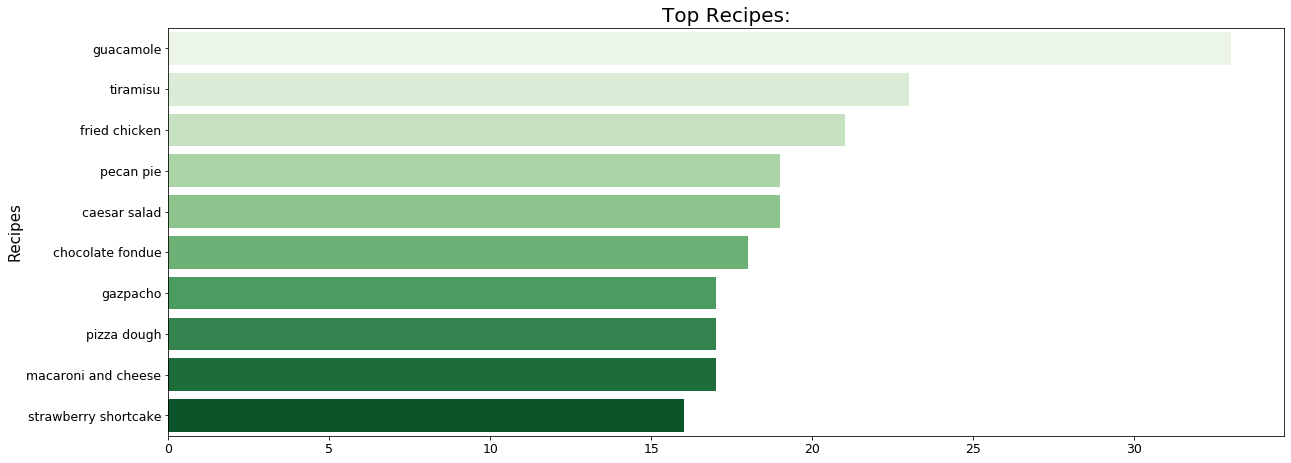

In [7]:
plt.figure(figsize=(20, 7.5))
sns.barplot(x=top_recipes, y=top_recipes.index, palette='Greens')
plt.title('Top Recipes:', size=20)
plt.xlabel('', size=15)
plt.ylabel('Recipes', size=15)
plt.xticks(size=12.5)
plt.yticks(size=12.5)

plt.savefig('graphs/top_recipes.png')
plt.show()

#### Ingredients:

In [40]:
# top_ingredients = df['ingredients'].str.split(' ')
top_ingredients = [x for x in df['ingredients_vector']]
# top_ingredients = [x.count for x in top_ingredients]
top_ingredients

["['celery', 'finely', 'chopped', 'green', 'pepper', 'finely', 'chopped', 'finely', 'sliced', 'green', 'onions', 'chopped', 'parsley', 'crabmeat', 'cups', 'coarsely', 'crushed', 'cracker', 'crumbs', 'salt', 'teaspoons', 'dry', 'mustarddash', 'hot', 'sauce', 'heavy', 'cream', 'melted', 'butter']",
 "['skirt', 'steak', 'cut', 'inch', 'dicekosher', 'salt', 'fresh', 'cracked', 'black', 'pepper', 'slices', 'thickcut', 'applewood', 'smoked', 'bacon', 'inch', 'diced', 'cups', 'inch', 'diced', 'red', 'onion', 'seeded', 'finely', 'diced', 'jalapenos', 'tablespoons', 'minced', 'garlic', 'kosher', 'salt', 'teaspoons', 'fresh', 'cracked', 'black', 'pepperapple', 'cider', 'vinegar', 'best', 'quality', 'cannellini', 'beans', 'liquid', 'lima', 'beans', 'liquid', 'kidney', 'beans', 'liquid', 'molasses', 'tablespoons', 'dark', 'brown', 'sugar', 'tablespoons', 'soy', 'sauce', 'ketchupcrusty', 'bread', 'serving']",
 "['cups', 'dried', 'black', 'beans', 'picked', 'rinsed', 'cups', 'water', 'plus', 'cloves

In [24]:
plt.figure(figsize=(20, 7.5))
sns.barplot(x=top_ingredients, y=top_ingredients.index, palette='Reds')
plt.title('Top Recipes:', size=20)
plt.xlabel('', size=15)
plt.ylabel('Recipes', size=15)
plt.xticks(size=12.5)
plt.yticks(size=12.5)

plt.savefig('graphs/top_recipes.png')
plt.show()

ValueError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1440x540 with 0 Axes>